# 👩‍💻 Activité 2 : Comment récupérer des données ? - PARTIE 2 : API, bases de données et web scraping

<img src="https://cdn.pixabay.com/photo/2022/05/23/17/28/big-data-7216774_960_720.png" alt="base de données" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - A quoi sert une API ?
___
Les **API** permettent de récupérer facilement des **données** depuis un **serveur** de manière **normalisée** et indépendamment du langage de programmation utilisé.

Source : https://fr.wikipedia.org/wiki/Interface_de_programmation
___
### - Quelles sont les deux grandes catégories de bases de données ?
___
Les deux grandes catégories de bases de données sont les bases de données **relationnelles SQL** et **No-SQL** (Not only SQL)

Source : https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es
___
### - Quelle différence fondamentale existe-t-il entre une base de données SQLite et PostgreSQL ?
___
La base de données **SQLite** est contenue dans un **fichier** alors le SGBD PostgreSQL fonctionne sur le **paradigme client-serveur**.

Source :

- https://fr.wikipedia.org/wiki/Client-serveur
- https://www.postgresql.org/
- https://www.sqlite.org/index.html
___
### - Quelles sont les bibliothèques Python utiles pour travailler avec des bases de données ?
___
Bibliothèques pour travailler avec des **bases de données** :

- Pour SQLite : [sqlite3](https://docs.python.org/3/library/sqlite3.html)
- Pour PostgreSQL : [psycopg](https://www.psycopg.org/)
- Pour MongoDB : [pymongo](https://pymongo.readthedocs.io/en/stable/)
- ...

Bibliothèque ayant des **fonctionnalités** pour travailler avec des bases de données :

- Pandas avec [`pandas.read_sql()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)
___
### - En quoi consiste le web scraping ?
___
Le web scraping consiste à **récupérer des données** d'un site web grâce à un **script**.

Source : https://fr.wikipedia.org/wiki/Web_scraping
___
### - Quelles sont les bibliothèques Python utiles pour faire du web scraping ?
___
Bibliothèques **centrées sur le scraping** :

- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Scrapy](https://scrapy.org/)
- [Selenium](https://selenium-python.readthedocs.io/)

Bibliothèque ayant des **fonctionnalités** pour scraper des données :

- Pandas avec [`pandas.read_html()`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) ou [`pandas.read_clipboard()`](https://pandas.pydata.org/docs/reference/api/pandas.read_clipboard.html)
___
### - Pourquoi les algorithmes de web scraping demandent-ils en général beaucoup de maintenance ?
___
Les scripts de web scraping dépendent de la **struture des pages web scrapées** qui peuvent être **modifiées** à tout moment.
___

## ✏️ Activités

### 🥇 API (Application Programming Interface)

Les API permettent de **récupérer facilement des données** depuis un serveur de manière **normalisée** et indépendamment du langage de programmation utilisé. Pour récupérer les données d'une **API** en **Python**, il faut utiliser une bibliothèque qui permet d'**appeler un serveur** comme par exemple **[urllib](https://docs.python.org/fr/3/library/urllib.html) (bibliothèque standard)** ou **[requests](https://requests.readthedocs.io/en/latest/) (bibliothèque externe)**

- Effectuer une recherche du mot "Github" avec l'**API Opensearch de Wikipedia** en Python

In [41]:
import requests

In [42]:
URL = "https://en.wikipedia.org/w/api.php"
PARAMS = {
    "action": "opensearch",
    "namespace": "0",
    "search": "Github",
    "limit": "5",
    "format": "json"
}
r = requests.get(url=URL, params=PARAMS)
data = r.json()
print(data)

['Github', ['GitHub', 'GitHub Copilot', 'GitHub Flavored Markdown', 'GitHub Blocked', 'GitHub Atom'], ['', '', '', '', ''], ['https://en.wikipedia.org/wiki/GitHub', 'https://en.wikipedia.org/wiki/GitHub_Copilot', 'https://en.wikipedia.org/wiki/GitHub_Flavored_Markdown', 'https://en.wikipedia.org/wiki/GitHub_Blocked', 'https://en.wikipedia.org/wiki/GitHub_Atom']]


### 🥇 Bases de données

Les bases de données relationnelles **SQLite** ont l'avantage de **ne pas nécessiter de serveur** de base de données. Dans cette partie, on va créer une base de données SQLite à partir d'un **fichier CSV**.

- Grâce à la bibliothèque **sqlalchemy**, créer un **moteur de base de données SQLite** avec la méthode [`sqlalchemy.create_engine()`](https://docs.sqlalchemy.org/en/20/core/engines.html#sqlite)

In [61]:
import pandas as pd
from sqlalchemy import create_engine

In [62]:
engine = create_engine('sqlite:///my_db.db', echo=False)

- Récupérer dans un **dataframe Pandas** les données de la [Base officielle des codes postaux](https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/) à partir du **fichier CSV**

In [57]:
url = "https://www.data.gouv.fr/fr/datasets/r/3d30becb-f4ee-4541-9e06-7a80bb18fefb"
df = pd.read_csv(url, sep=";")

In [58]:
df

,code_commune_insee,nom_de_la_commune,code_postal,ligne_5,libelle_d_acheminement,coordonnees_gps
0,25620,VILLE DU PONT,25650,NaN,VILLE DU PONT,"46.999873398,6.498147193"
1,25624,VILLERS GRELOT,25640,NaN,VILLERS GRELOT,"47.361512085,6.235167025"
2,26001,SOLAURE EN DIOIS,26150,AIX EN DIOIS,SOLAURE EN DIOIS,"44.70587354,5.387770455"
3,26003,ALEYRAC,26770,NaN,ALEYRAC,"44.499150841,4.946083614"
4,26009,ANDANCETTE,26140,NaN,ANDANCETTE,"45.246625023,4.812717032"
...,...,...,...,...,...,...
39188,98820,OUVEA,98814,OUVEA,FAYAOUE,NaN
39189,98826,POUM,98826,NaN,POUM,NaN
39190,98831,VOH,98883,VOH,OUACO,NaN
39191,98833,KOUAOUA,98818,NaN,KOUAOUA,NaN


- Creér une **table "CodePostaux"** dans la base de données grâce à la méthode [`pandas.DataFrame.to_sql()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)

In [59]:
df.to_sql('CodePostaux', con=engine)

39193

- Exécuter une **requête SQL** sur la base de données pour vérifier que les données ont **bien été insérées**

In [60]:
engine.execute("SELECT * FROM CodePostaux").fetchall()

[(0, '25620', 'VILLE DU PONT', 25650, None, 'VILLE DU PONT', '46.999873398,6.498147193'),
 (1, '25624', 'VILLERS GRELOT', 25640, None, 'VILLERS GRELOT', '47.361512085,6.235167025'),
 (2, '26001', 'SOLAURE EN DIOIS', 26150, 'AIX EN DIOIS', 'SOLAURE EN DIOIS', '44.70587354,5.387770455'),
 (3, '26003', 'ALEYRAC', 26770, None, 'ALEYRAC', '44.499150841,4.946083614'),
 (4, '26009', 'ANDANCETTE', 26140, None, 'ANDANCETTE', '45.246625023,4.812717032'),
 (5, '26011', 'AOUSTE SUR SYE', 26400, None, 'AOUSTE SUR SYE', '44.706856708,5.057320177'),
 (6, '26013', 'ARPAVON', 26110, None, 'ARPAVON', '44.371127022,5.273184253'),
 (7, '26021', 'AUTICHAMP', 26400, None, 'AUTICHAMP', '44.683240066,4.972677118'),
 (8, '26024', 'BARCELONNE', 26120, None, 'BARCELONNE', '44.867074421,5.054652574'),
 (9, '26026', 'BARRET DE LIOURE', 26570, None, 'BARRET DE LIOURE', '44.175483103,5.516253783'),
 (10, '26027', 'BARSAC', 26150, None, 'BARSAC', '44.726373096,5.304155411'),
 (11, '26028', 'BATHERNAY', 26260, None, '

### 🥈 Web scraping

Dans un premier temps, on va utiliser les fonctions suivantes de **Pandas** qui permettent de **récupérer des données sur le web** : [`pandas.read_html()`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) et [`pandas.read_clipboard()`](https://pandas.pydata.org/docs/reference/api/pandas.read_clipboard.html). Ceci fonctionne bien si les **tableaux HTML sont bien construits**. Dans le cas contraire, il faut effectuer un **scraping plus "manuel"** (avec les bibliothèques [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), [Scrapy](https://scrapy.org/) ou [Selenium](https://selenium-python.readthedocs.io/) par exemple).

- Grâce à la fonction [`pandas.read_html()`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) de Pandas, récupérer le tableau de la distribution des salaires mensuels nets en France - [Figure 2](https://www.insee.fr/fr/statistiques/6436313#tableau-figure2). Utiliser le paramètres `attrs` de la méthode `read_html()` pour ne récupérer que le tableau voulu.

In [63]:
import pandas as pd

In [64]:
# Figure 2 – Distribution des salaires mensuels nets en équivalent temps plein (EQTP) en 2020
url = "https://www.insee.fr/fr/statistiques/6436313#tableau-figure2"
list_df = pd.read_html(url, attrs={"id" : "produit-tableau-figure2"})
df = list_df[0]
df

,Salaires mensuels nets (en euros),Effectifs (en EQTP)
0,Moins de 1 200,583 943
1,De 1 200 à 1 300,613 321
2,De 1 300 à 1 400,835 135
3,De 1 400 à 1 500,969 172
4,De 1 500 à 1 600,1 052 630
...,...,...
75,De 8 600 à 8 700,6 138
76,De 8 700 à 8800,5 772
77,De 8 800 à 8 900,5 585
78,De 8 900 à 9 000,5 408


- Tranformer la colonne "Effectifs (en EQTP)" en **integer** (attention au caractère "\xa0")

In [65]:
df["Effectifs (en EQTP)"] = df["Effectifs (en EQTP)"].str.replace("\xa0", "").astype("int")

- Grâce à la bibliothèque Matplotlib ou Seaborn, tracer l'**histogramme des données**

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

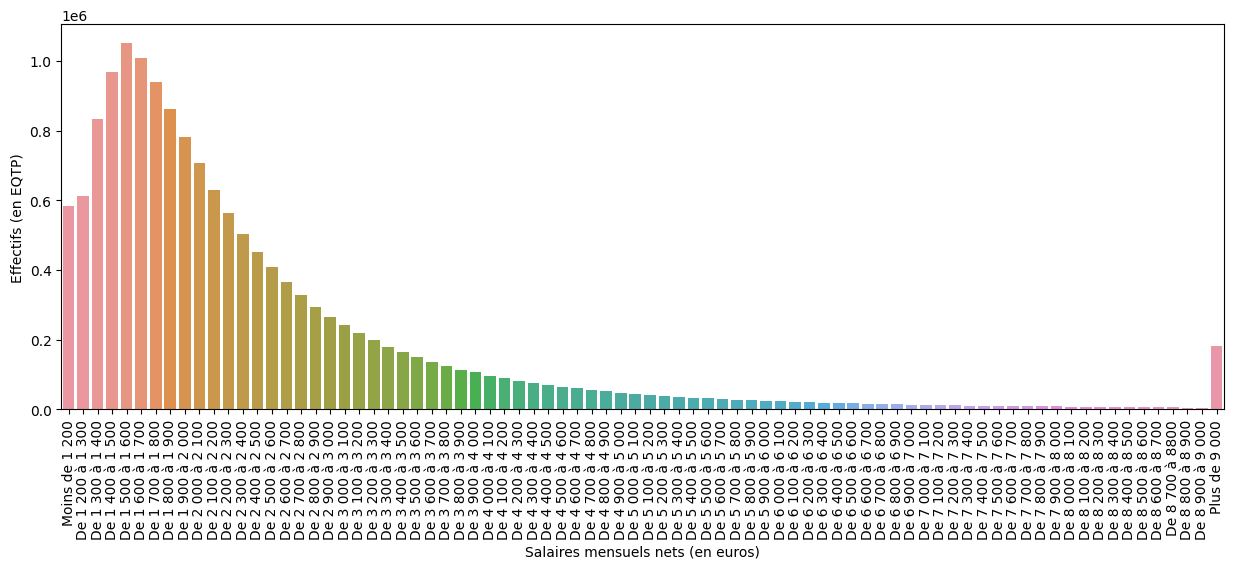

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="Salaires mensuels nets (en euros)", y="Effectifs (en EQTP)")
plt.xticks(rotation=90)
plt.show()

- 🥇 Grâce à la méthode de dataframe [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html), créer un **fichier CSV** à partir des données récupérées sur le web qui sera réutilisé dans l'activité N°3. Vérifier son contenu

In [69]:
df.to_csv("figure_2.csv", index=False)

- 🥉Grâce à la fonction [`pandas.read_clipboard()`](https://pandas.pydata.org/docs/reference/api/pandas.read_clipboard.html), récupérer le tableau de la répartition des salaires - [Figure 3](https://www.insee.fr/fr/statistiques/6436313#tableau-figure3) dans un dataframe **depuis le presse-papier**.

In [70]:
df_clipboard = pd.read_clipboard(header=None)
df_clipboard

,0,1,2
0,1er décile,1 343,"1,1"
1,2e décile,1 507,"1,9"
2,3e décile,1 655,"2,3"
3,4e décile,1 816,"2,6"
4,Médiane,2 005,"2,7"
5,6e décile,2 241,"2,9"
6,7e décile,2 562,"3,2"
7,8e décile,3 053,"3,6"
8,9e décile,4 033,"4,3"
9,95e centile,5 245,"4,7"


- 🥇 Grâce à la méthode de dataframe [`pandas.DataFrame.to_json()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html), créer un **fichier JSON** à partir des données récupérées sur le web qui sera réutilisé dans l'activité N°3. Vérifier son contenu

In [72]:
df_clipboard.to_json("figure_3.json")

Dans cette partie, on va effectuer du **web scraping** de cette url (https://www.scrapethissite.com/pages/simple/) pour récupérer les **noms de pays** et le **nombre d'habitants**.

- Faire une **requête GET** sur l'url https://www.scrapethissite.com/pages/simple/ grâce à la bibliothèque [requests](https://requests.readthedocs.io/en/latest/)

In [73]:
import requests

In [75]:
url = "https://www.scrapethissite.com/pages/simple/"
r = requests.get(url)
data = r.text
data

'<!doctype html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>\n    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">\n\n    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">\n    <link href=\'https://fonts.googleapis.com/css?family=Lato:400,700\' rel=\'stylesheet\' type=\'text/css\'>\n    <link rel="stylesheet" type="text/css" href="/static/css/styles.css"

- Analyser la **structure de la page HTML** pour récupérer le **nom du pays** et le **nombre d'habitants** grâce à la bibliothèque [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Mettre les données dans un **dataframe Pandas**.

In [76]:
from bs4 import BeautifulSoup

In [84]:
soup = BeautifulSoup(data, 'html.parser')
temp_dic = {"Pays":[], "Population":[]}
for div in soup.find_all("div", class_="country"):
    if div.find("h3").text.strip()!="" and div.find("span", class_="country-population").text.strip()!="":
        temp_dic["Pays"].append(div.find("h3").text.strip())
        temp_dic["Population"].append(div.find("span", class_="country-population").text.strip())
df = pd.DataFrame(temp_dic)
df

,Pays,Population
0,Andorra,84000
1,United Arab Emirates,4975593
2,Afghanistan,29121286
3,Antigua and Barbuda,86754
4,Anguilla,13254
...,...,...
245,Yemen,23495361
246,Mayotte,159042
247,South Africa,49000000
248,Zambia,13460305


## 🚀 Pour aller plus loin

- Python Web Scraping - Should I use Selenium, Beautiful Soup or Scrapy? [2020] : https://www.youtube.com/watch?v=zucvHSQsKHA

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par I am AFK  •  So long, and thanks for all the likes! de Pixabay